# Explanatory effects of Ford GoBike Characteristics on Trip Durations

## by (Rofiah Adeshina)

## Investigation Overview
In this investigation, I focused on the duration of the bike trips of the Ford GoBike sharing system in San Francisco. The main focus was on the features `user_type`, `members age`,	`member_gender`, `period of day (day/night)`.


## Dataset Overview
This data consisted of 183412 bike trips recorded in the dataset with 16 features recorder per trip. These features cover the these areas:
* time of the ride 
* the location of the ride  
* information about the bike and it's rider

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#convert start_time and end_time to datetime datatype
bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])

bike_data['end_time'] = pd.to_datetime(bike_data['end_time'])

In [4]:
# engineer the member's age
bike_data['current_year'] = bike_data['end_time'].dt.year
# age = current year - members birth year
bike_data['member_age'] = bike_data['current_year'] - bike_data['member_birth_year']

In [5]:
# create weekday column
bike_data['weekday'] = bike_data['start_time'].dt.day_name().str.slice(stop=3)

In [6]:
#create trip_period column
bike_data['start_hour'] = bike_data['start_time'].dt.hour

bike_data['trip_period'] = 'morning'
bike_data['trip_period'][(bike_data['start_hour'] >= 12) & (bike_data['start_hour'] <= 17)] = 'afternoon'
bike_data['trip_period'][(bike_data['start_hour'] >= 18) & (bike_data['start_hour'] <= 23)] = 'night'

In [7]:
# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'trip_period': ['morning', 'afternoon', 'night'],
                    'weekday': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike_data[var] = bike_data[var].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Durations

Trip durations take on a very large range of values from 60sec to above 80000 (80 kilo-secs - 80ks) at the highest.
When plotted on a log-scale, the price distribution looks roughly unimodal.

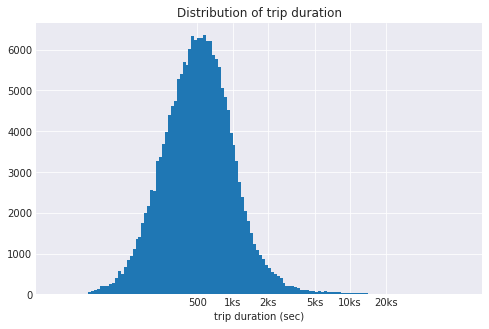

In [8]:
sb.set_style('darkgrid')
log_binsize = 0.025
bins = 10 ** np.arange(1.5, np.log10(bike_data['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'duration_sec', bins = bins)
plt.title('Distribution of trip duration')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1ks', '2ks', '5ks', '10ks', '20ks'])
plt.xlabel('trip duration (sec)')
plt.show()

## Distribution of Trip user_type, 

There are basically two set of people that ride the Ford GoBikes, the subscribers and customers. Most of the riders are subscribers and therefore members of the Ford Gobike-sharing system. Only 10.8% of the users 
are customers

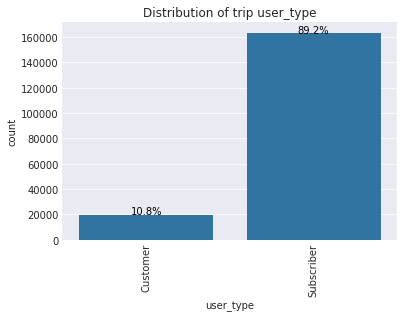

In [9]:
# let's view the user_type distribution
default_color = sb.color_palette()[0]
sb.countplot(data = bike_data, x = 'user_type', color = default_color);

# Count the frequency of unique values in the `user_type` column of bike_data dataframe.
type_counts = bike_data['user_type'].value_counts()

# Returns the sum of all not-null values in `user_type` column
n_members = bike_data['user_type'].value_counts().sum()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_members)
    
    plt.title('Distribution of trip user_type')

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

## Duration Vs. Age

A large number of the riders below 50 years have high number of trip duration some well above 80000 sec (22 hours) indicating that individuals can rent the bikes for over a day. Only a few are well above 100 and their trip durations below 20 minutes



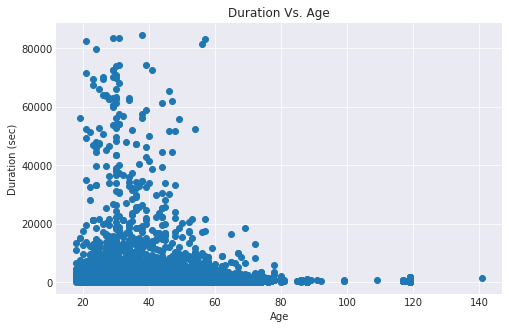

In [10]:
# correlation plot
plt.figure(figsize = [8, 5])
plt.scatter(data=bike_data, x='member_age', y='duration_sec')
plt.title('Duration Vs. Age')
plt.xlabel('Age')
plt.ylabel('Duration (sec)');

## Duration Vs. Categorical variables

* The bike durations are mostly less than 40 minutes with peaks in during weekdays and morning to afternoon period which reduces towarsd the night time.
* Although there are more subscribers than customers, customers take longer trips
* a lot of riders below 50 years have high number of trip duration some well above 80000 sec (22 hours) indicating that individuals can rent the bikes for over a day
* Female and other gender members take longer trip durations than male members
* Trips last longer on weekends (sat, sun) and afternoons. 

In [11]:
num_vars = ['duration_sec','start_station_latitude','start_station_longitude', 
            'end_station_latitude','end_station_longitude','member_birth_year','member_age']

cat_vars = ['user_type', 'member_gender', 'weekday', 'trip_period' ]

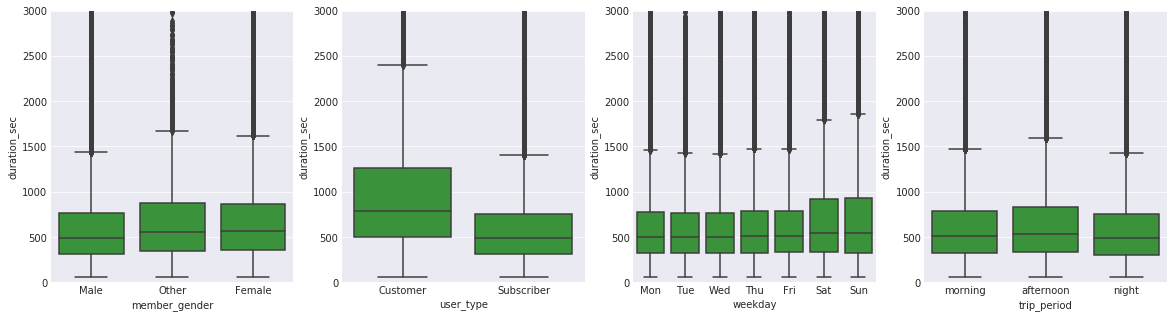

In [12]:
plt.figure(figsize = [20, 5])


base_color = sb.color_palette()[2]

def boxgrid(var1, var2):
    sb.boxplot(data = bike_data, x = var1, y = var2, color = base_color) 
    
plt.subplot(1, 4, 1)
base_color = sb.color_palette()[2]
boxgrid('member_gender', 'duration_sec')
plt.ylim([0, 3000])

plt.subplot(1, 4, 2)
base_color = sb.color_palette()[2]
boxgrid('user_type', 'duration_sec')
plt.ylim([0, 3000])

plt.subplot(1, 4, 3)
base_color = sb.color_palette()[2]
boxgrid('weekday', 'duration_sec')
plt.ylim([0, 3000])

plt.subplot(1, 4, 4)
base_color = sb.color_palette()[2]
boxgrid('trip_period', 'duration_sec')
plt.ylim([0, 3000])
plt.show()

In [13]:
# select bike rides of weekends
bike_flag = bike_data['weekday'].isin(['Sat','Sun'])
bike_weekend = bike_data.loc[bike_flag,:]

## Weekend rides duration across user_type and member_gender

During the weekends female customers take longer rides, while other-gender subcribers take longer rides than their male/female subcribers.

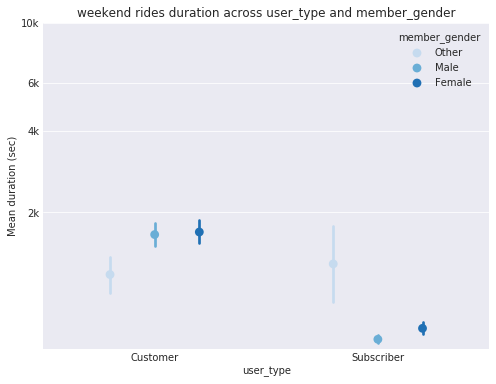

In [14]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike_weekend, x = 'user_type', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('weekend rides duration across user_type and member_gender')
plt.ylabel('Mean duration (sec)')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Explanatory_effects_of_Ford_GoBike_Characteristics_on_Trip_Durations.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 